In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
#sns.set(font_scale=1.5)

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import decomposition

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score,v_measure_score, completeness_score

In [2]:
# Random seed for duplication of the code
np.random.seed(0)

## Visualising Dataset 

In [3]:
def visualize(x, y, title, axes=None):
    
    if len(x[0] > 2):
        pca = decomposition.PCA(n_components=2)
        pca.fit(x)
        x = pca.transform(x)
    
    x0 = [i[0] for i in x]    
    x1 = [i[1] for i in x]
    
    df = pd.DataFrame.from_dict({'x1' : x0, 'x2': x1,
                                'label' : y})
    df["label"] = df["label"].astype(str)
    
    p = sns.scatterplot(ax = axes, data=df, x='x1', y = 'x2', hue='label', legend=None)
    if axes is not None:
        axes.set_title(title)
        if len(set(y)) > 5:
            plt.legend([],[], frameon=False)
    else:
        sns.scatterplot(data=df, x='x1', y = 'x2', hue='label', legend=None)
        plt.show()

    return

In [4]:
df = pd.read_csv('./Data/Iris.csv')

In [5]:
col_input = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = df[col_input].values
y = df['Species'].values

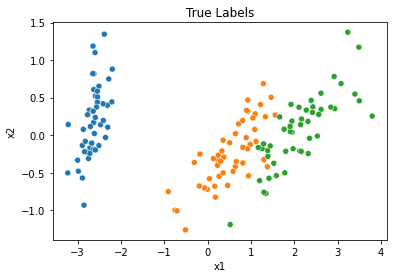

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
visualize(x, y, 'True Labels', axes)

In [7]:
def print_metric(x, y, target):
    def get_accuracy(y, target):
        mapping = {}
        
        result = pd.DataFrame.from_dict({'Cluster' : y, 'species' : target})
        
        min_range = -1 if -1 in y else 0
        max_range = None

        max_range = min_range + 3 if len(set(y)) > 3 else min_range + len(set(y))

        range_val = range(min_range, max_range)
        
        for cluster_num in range_val:
            OneCluster = pd.DataFrame(result[result['Cluster'] == cluster_num].groupby('species').size())
            OneCluster.columns=['Size']
            NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
            NewDigit[0]
            
            rowIndex = result.index[result['Cluster'] == cluster_num]
            result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
        
        Correct = (result['species'] == result['TransLabel']).sum()
        Accuracy = round(Correct/df.shape[0],3)
        print('\t Accuracy : ', Accuracy)
        
    
    try:
        get_accuracy(y, target)
        print('\t Silhouette Score : ', silhouette_score(x, y))
        print('\t David Bouldin Score : ', davies_bouldin_score(x, y))
        print('\t Calinski Harabasz Score : ', calinski_harabasz_score(x, y))
        print('\t Homogenity Score : ', homogeneity_score(target, y))
        print('\t Completeness Score', completeness_score(target, y))
        print('\t V Measure Score', v_measure_score(target, y))
        print('\t Adjusted Random Score', adjusted_rand_score(target, y))
        print('\t Adjusted Mutual Info Score', adjusted_mutual_info_score(target, y))
        
    except Exception as e:
        print('\t',e)

In [8]:
def plot_elbow(dataset, min_sample=3):
    neighbors = NearestNeighbors(n_neighbors=20)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel('Data points')
    plt.ylabel('Epsilon')
    plt.show()

## DBSCAN

### Changing the epsilon value

[0] eps : 0.01 Number of clusters :  3
	 Accuracy :  0.367
	 Silhouette Score :  -0.5350223096463391
	 David Bouldin Score :  1.0781548539806491
	 Calinski Harabasz Score :  2.9930510306061384
	 Homogenity Score :  0.033625370125249764
	 Completeness Score 0.21913382661383224
	 V Measure Score 0.05830415764818812
	 Adjusted Random Score 0.0009368470652710237
	 Adjusted Mutual Info Score 0.03206775468629455
[1] eps : 0.05 Number of clusters :  3
	 Accuracy :  0.367
	 Silhouette Score :  -0.5350223096463391
	 David Bouldin Score :  1.0781548539806491
	 Calinski Harabasz Score :  2.9930510306061384
	 Homogenity Score :  0.033625370125249764
	 Completeness Score 0.21913382661383224
	 V Measure Score 0.05830415764818812
	 Adjusted Random Score 0.0009368470652710237
	 Adjusted Mutual Info Score 0.03206775468629455
[2] eps : 0.1 Number of clusters :  5
	 Accuracy :  0.36
	 Silhouette Score :  -0.5147160221473809
	 David Bouldin Score :  0.9358624963956604
	 Calinski Harabasz Score :  3.269345

<Figure size 432x288 with 0 Axes>

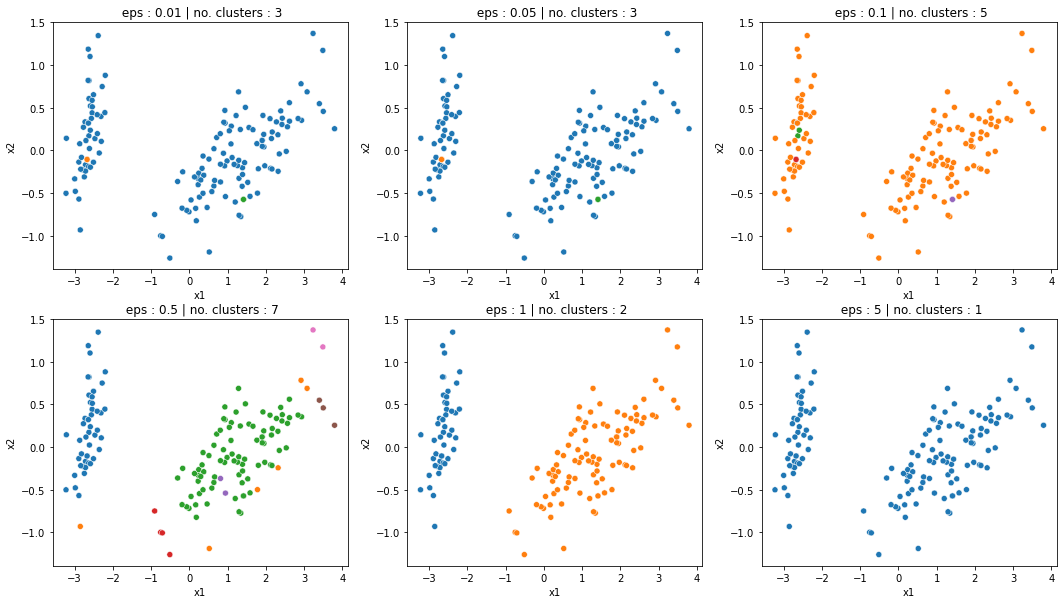

In [9]:
eps_space = [0.01, 0.05, 0.1, 0.5, 1, 5]

plt.figure(1)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(len(eps_space)):
    eps = eps_space[i]
    
    clustering = DBSCAN(eps=eps, min_samples=2).fit(x)
    
    num = len(set(clustering.labels_))

    print(f'[{i}] eps : {eps} Number of clusters : ', num)
    print_metric(x, clustering.labels_, y)
    
    visualize(x, clustering.labels_, f" eps : {eps} | no. clusters : {num}", axes[i//3, i%3])
plt.show()

### Changing the minimum sample

[0] min sample : 1 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.9248640964316
	 Homogenity Score :  0.5793801642856945
	 Completeness Score 0.9999999999999997
	 V Measure Score 0.7336804366512104
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[1] min sample : 2 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.9248640964316
	 Homogenity Score :  0.5793801642856945
	 Completeness Score 0.9999999999999997
	 V Measure Score 0.7336804366512104
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[2] min sample : 3 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.92486409643

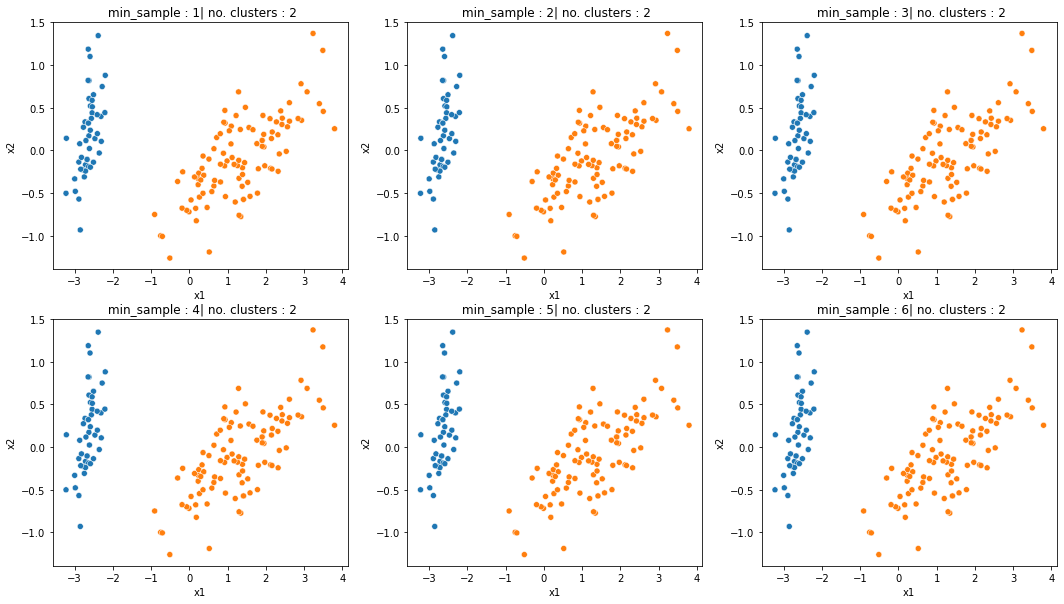

In [10]:
min_sample_space = [1,2,3,4,5,6]
eps = 1
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
for i in range(len(min_sample_space)):
    min_sample = min_sample_space[i]  
    
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(x)
    
    num = len(set(clustering.labels_))

    print(f'[{i}] min sample : {min_sample} Number of clusters : ', num)
    print_metric(x, clustering.labels_, y)
    visualize(x, clustering.labels_, f" min_sample : {min_sample}| no. clusters : {num}", axes[i//3, i%3])
plt.show()

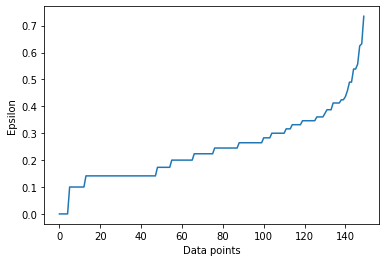

In [15]:
from sklearn.neighbors import NearestNeighbors
plot_elbow(x, min_sample=2)

	 Accuracy :  0.647
	 Silhouette Score :  0.24194106117281686
	 David Bouldin Score :  2.559205765007262
	 Calinski Harabasz Score :  79.64941802293538
	 Homogenity Score :  0.8555893610823645
	 Completeness Score 0.5987884809971868
	 V Measure Score 0.7045171331094027
	 Adjusted Random Score 0.7048053311544831
	 Adjusted Mutual Info Score 0.6918872204372657
[5] min sample : 6 Number of clusters :  8


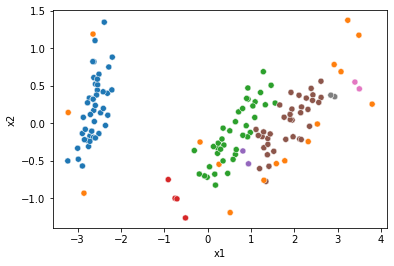

In [16]:
clustering = DBSCAN(eps=0.4, min_samples=2).fit(x)
print_metric(x, clustering.labels_, y)
print(f'[{i}] min sample : {min_sample} Number of clusters : ', len(set(clustering.labels_)))
visualize(x, clustering.labels_, f" min_sample : {min_sample}")

# Changing Metric

[0] metric : cityblock 	 Number of clusters :  4
	 Accuracy :  0.68
	 Silhouette Score :  0.4082112461583428
	 David Bouldin Score :  2.1903951878551937
	 Calinski Harabasz Score :  185.215018749437
	 Homogenity Score :  0.5967107925971032
	 Completeness Score 0.8547421976791721
	 V Measure Score 0.7027907864191272
	 Adjusted Random Score 0.5600964505074094
	 Adjusted Mutual Info Score 0.6949938346107
[1] metric : cosine 	 Number of clusters :  1
	 Accuracy :  0.333
	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
[2] metric : euclidean 	 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.9248640964316
	 Homogenity Score :  0.5793801642856945
	 Completeness Score 0.9999999999999997
	 V Measure Score 0.7336804366512104
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[3] metric : l1 	 Number of clusters :  4
	 Ac

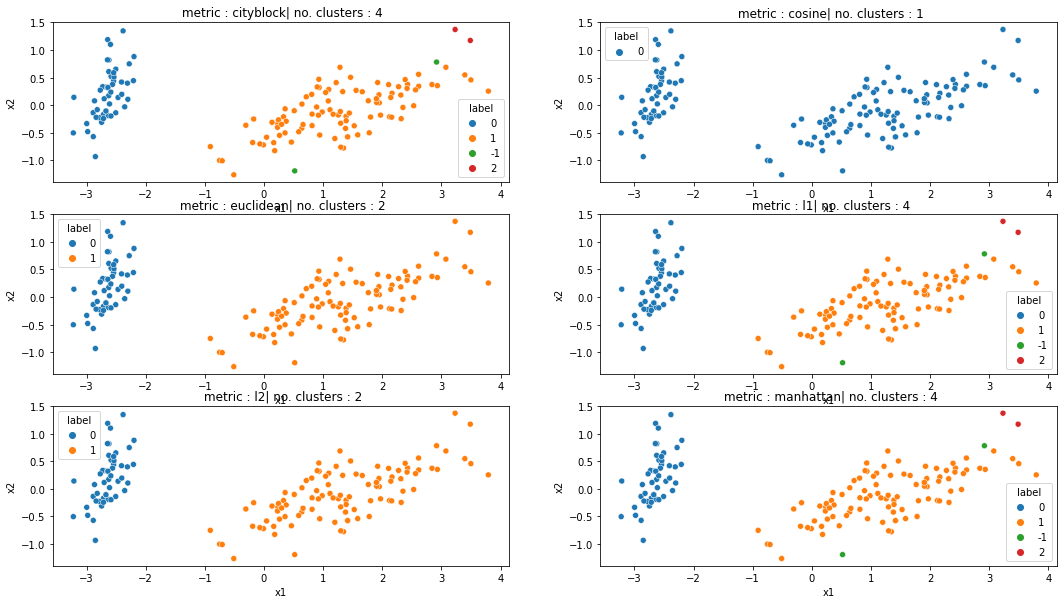

In [10]:
metric_space = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']

eps = 1
min_sample = 2

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

for i in range(len(metric_space)):
    metric = metric_space[i]    
    
    clustering = DBSCAN(eps=eps, min_samples=min_sample, metric = metric).fit(x)
    
    num = len(set(clustering.labels_))

    print(f'[{i}] metric : {metric} \t Number of clusters : ', num)
    print_metric(x, clustering.labels_, y)
    visualize(x, clustering.labels_, f" metric : {metric}| no. clusters : {num}", axes[i//2, i%2])
plt.show()

## Changing P

[0] P : 1 	 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.9248640964316
	 Homogenity Score :  0.5793801642856945
	 Completeness Score 0.9999999999999997
	 V Measure Score 0.7336804366512104
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[1] P : 2 	 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.9248640964316
	 Homogenity Score :  0.5793801642856945
	 Completeness Score 0.9999999999999997
	 V Measure Score 0.7336804366512104
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[2] P : 3 	 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6863930543445408
	 David Bouldin Score :  0.3835952094491398
	 Calinski Harabasz Score :  501.9248640964316
	 Homogenity Score

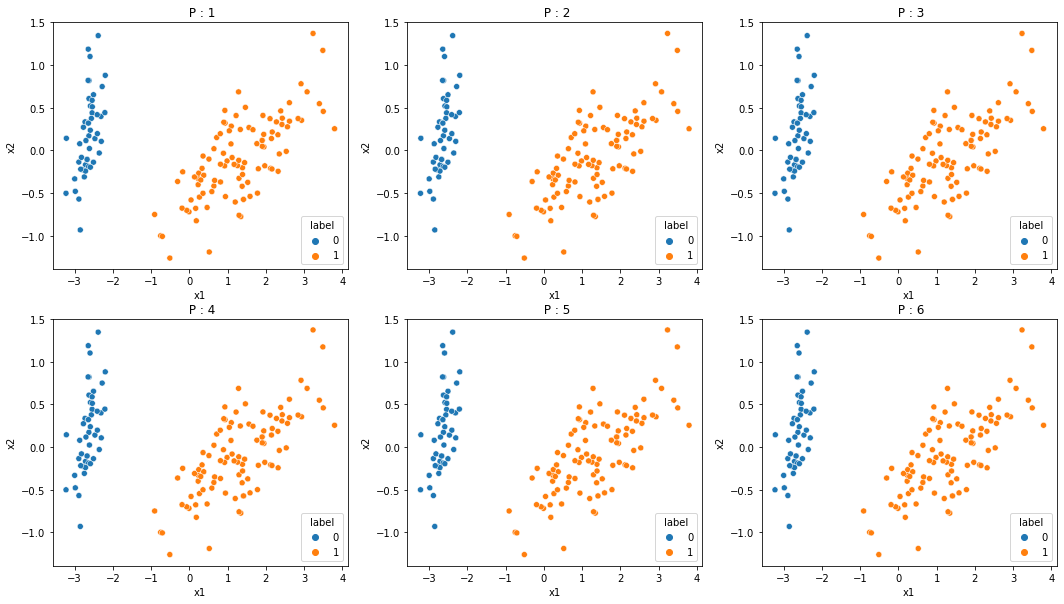

In [11]:
p_space = [1,2,3,4,5,6]

eps = 1
min_sample = 2
metric = 'euclidean'

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(len(p_space)):
    p = p_space[i] 
    
    
    clustering = DBSCAN(eps=eps, min_samples=min_sample, metric = metric, p = p).fit(x)

    print(f'[{i}] P : {p} \t Number of clusters : ', len(set(clustering.labels_)))
    print_metric(x, clustering.labels_, y)
    visualize(x, clustering.labels_, f" P : {p}", axes[i//3, i%3])
plt.show()

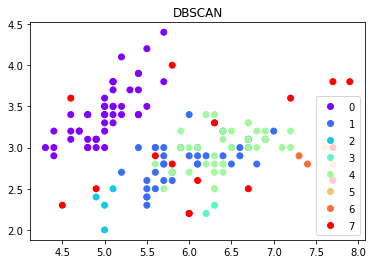

In [19]:
fig = plt.figure(figsize=(6,4))

l = DBSCAN(eps=0.4, min_samples=2).fit(x).labels_
l = [max(set(l)) + 1 if i == -1 else i for i in l]

x0 = [i[0] for i in x]    
x1 = [i[1] for i in x]
    
df = pd.DataFrame.from_dict({'x1' : x0, 'x2': x1,
                                'label' : l})
df["label"] = df["label"].astype(str)
    
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = list([df['label']]), cmap = 'rainbow')
plt.legend(*scatter.legend_elements())
plt.title('DBSCAN')
plt.show()